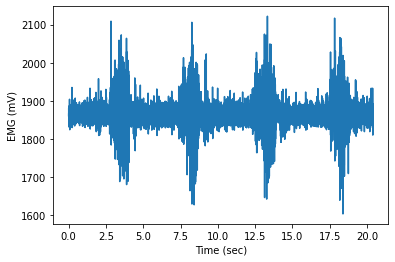

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


dir = os.path.join(os.path.realpath(''),'Data/emg3.txt')
emg = []


with open(dir) as f:
    lines = f.readlines()
for l in lines:
    emg.append(float(l.replace("\n","")))

time = np.array([i/1000 for i in range(0, len(emg), 1)]) # sampling rate 1000 Hz

# plot EMG signal
fig = plt.figure()
plt.plot(time, emg)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (mV)')
fig_name = 'rawEMG.png'
#fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)


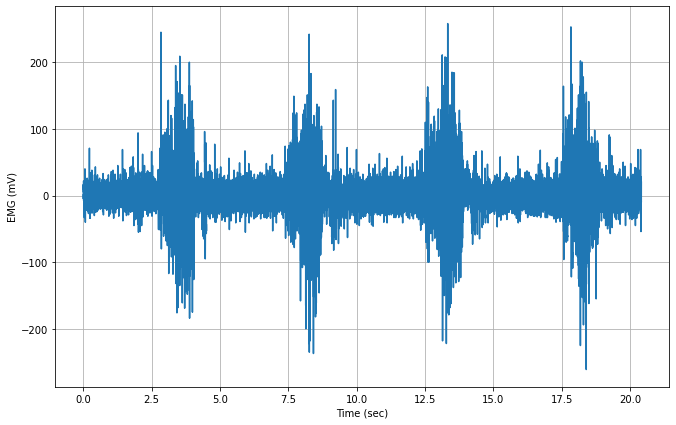

In [3]:
# process EMG signal: remove mean = Detrend
emg_detrend = emg - np.mean(emg)

fig_detrend = plt.figure()
plt.plot(time, emg_detrend)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (mV)')
plt.grid()
fig_name = 'detrendEMG.png'
fig_detrend.set_size_inches(w=11,h=7)
fig_detrend.savefig(fig_name)


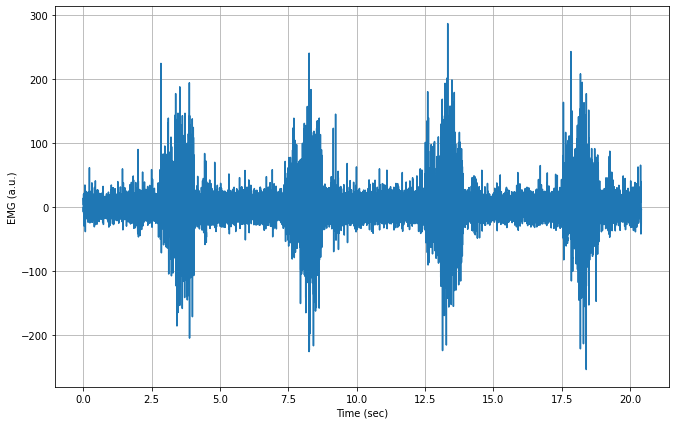

In [4]:
import scipy as sp
from scipy import signal

# create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_detrend)

# plot comparison of unfiltered vs filtered mean-corrected EMG
fig = plt.figure()


plt.plot(time, emg_filtered)

plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
plt.grid()
#fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)


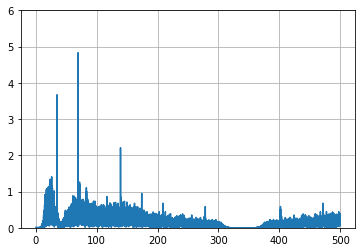

In [5]:
from scipy.fft import fft, fftfreq
# Number of sample points

N = 30000

# sample spacing

T = 1.0 / 1000.0

x = np.linspace(0.0, N*T, N, endpoint=False)

# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(emg_filtered)

xf = fftfreq(N, T)[:N//2]


plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.ylim(0.0, 6.0)
plt.grid()

plt.show()


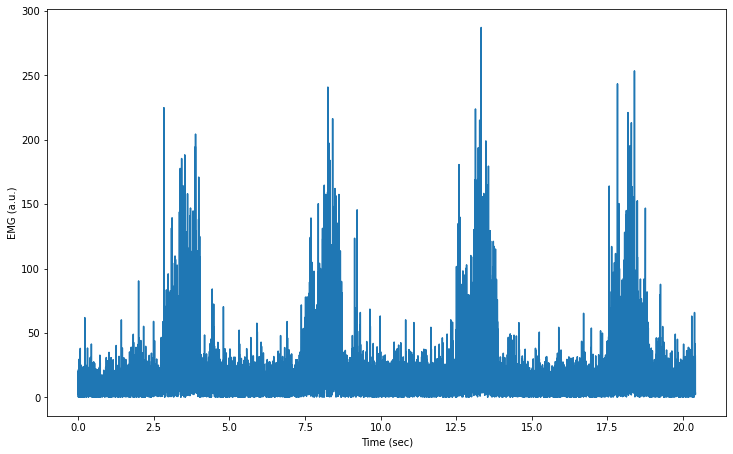

In [6]:
# process EMG signal: rectify
emg_rectified = abs(emg_filtered)

# plot comparison of unrectified vs rectified EMG
fig = plt.figure()

plt.plot(time, emg_rectified)

plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)


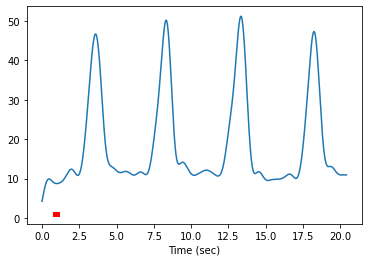

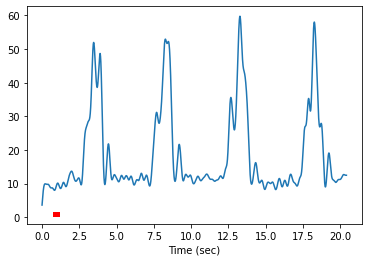

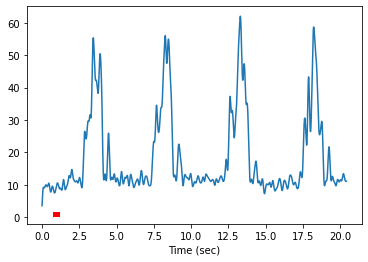

In [7]:
def filteremg(time, emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    
    plt.plot(time, emg_envelope)

    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    

# show what different low pass filter cut-offs do
for i in [1, 3, 5]:
    filteremg(time, emg_detrend, low_pass=i)

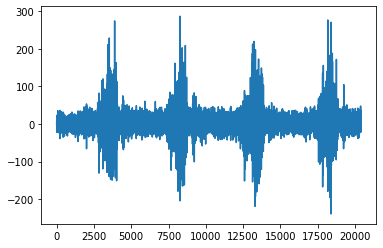

In [8]:
import biosignalsnotebooks as bsnb
# [Baseline Removal]

# [Signal Filtering]
low_cutoff = 20 # Hz
high_cutoff = 450 # Hz

# Application of the signal to the filter.
pre_pro_signal = bsnb.aux_functions._butter_bandpass_filter(emg_detrend, low_cutoff, high_cutoff, 1000)
plt.plot(pre_pro_signal)
tkeo = []
for i in range(0, len(time)):
    if i == 0 or i == len(time) - 1:
        tkeo.append(pre_pro_signal[i])
    else:
        tkeo.append(np.power(pre_pro_signal[i], 2) - (pre_pro_signal[i + 1] * pre_pro_signal[i - 1]))

bsnb.plot([list(time), list(time)], [list(emg_rectified), list(tkeo)], legend=["Original EMG", "TKEO Signal"], grid_plot=True, grid_lines=1, grid_columns=2, opensignals_style=True, x_axis_label="Time (s)", y_axis_label=["Raw Data", "Raw Data"])

In [ ]:
smoothing_level_perc = 20 # Percentage.
smoothing_level = int((smoothing_level_perc / 100) * 1000)
rect_signal = np.absolute(tkeo)
rect_signal = bsnb.aux_functions._moving_average(rect_signal, 100)
smooth_signal = []
for i in range(0, len(rect_signal)):
    if smoothing_level < i < len(rect_signal) - smoothing_level:
        smooth_signal.append(np.mean(rect_signal[i - smoothing_level:i + smoothing_level]))
    else:
        smooth_signal.append(0)
        
    return;
int x = 3;
print (x)



In [12]:
activation_data = bsnb.detect_emg_activations(emg_detrend, 1000, smooth_level=20, threshold_level=10, time_units=True, volts=False, resolution=None, device='device', plot_result=True)